In [1]:
# Import key Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load data 
raw = pd.read_excel('Online Retail.xlsx')
raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
retail = raw
retail.shape

(541909, 8)

In [3]:
# View of NA rows across different features
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
# If we dropped any rows with NA, how many rows would we have left?
retail.dropna().shape

(406829, 8)

In [5]:
# Display object key information including Count, Unique values, Top value and frequency
retail.describe(include=['object'])

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [6]:
# Display statistics for numeric features including Count, Mean, Standard Deviation, Min, Max, etc.
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# Number of records with negative quantity
retail.Quantity[retail.Quantity < 0 ].count()

10624

In [8]:
# Quick inspection of top records with Negative Quantity
retail.loc[retail.Quantity < 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [9]:
# Number of records with negative Unit Price 
retail.UnitPrice[retail.UnitPrice < 0].count()

2

In [10]:
# Quick exploration of negative price records
retail.loc[retail.UnitPrice < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [11]:
# Breaking down Invoice Number into Code and Number
retail['InvoiceNumber'] = retail.InvoiceNo.astype(str).str[-6:]
retail['InvoiceCode'] = retail.InvoiceNo.astype(str).str[-7:-6]

In [12]:
# Transforming InvoiceDate column to datetime type and mapping to a new columne as InvoiceDateTime
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])

In [13]:
# Construct Year, Month and YearMonth from Invoice Date field
retail['Year'], retail['Month'] = retail['InvoiceDate'].dt.year, retail['InvoiceDate'].dt.month
retail['YearMonth'] = retail['InvoiceDate'].map(lambda x: 100*x.year + x.month)

In [14]:
# Create "Date" column in datetime format to use for index
retail['Date'] = pd.to_datetime(retail.InvoiceDate.dt.date)
retail.set_index('Date', inplace=True)

In [15]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541909 entries, 2010-12-01 to 2011-12-09
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      541909 non-null  object        
 1   StockCode      541909 non-null  object        
 2   Description    540455 non-null  object        
 3   Quantity       541909 non-null  int64         
 4   InvoiceDate    541909 non-null  datetime64[ns]
 5   UnitPrice      541909 non-null  float64       
 6   CustomerID     406829 non-null  float64       
 7   Country        541909 non-null  object        
 8   InvoiceNumber  541909 non-null  object        
 9   InvoiceCode    541909 non-null  object        
 10  Year           541909 non-null  int64         
 11  Month          541909 non-null  int64         
 12  YearMonth      541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 57.9+ MB


In [16]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth
Date,,,,,,,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,536365,,2010,12,201012
2010-12-01,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,,2010,12,201012
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,536365,,2010,12,201012
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,,2010,12,201012
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,,2010,12,201012


In [17]:
# Counting types of Invoices
retail.InvoiceCode.value_counts()

     532618
C      9288
A         3
Name: InvoiceCode, dtype: int64

In [18]:
# Replacing '' with 'N', to reflect Normal transactions
retail.InvoiceCode.replace({'': 'N'}, inplace = True)
retail.InvoiceCode.unique()

array(['N', 'C', 'A'], dtype=object)

In [19]:
# Inspecting type A and C invoices
retail[retail.InvoiceCode == "A"].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth
Date,,,,,,,,,,,,,
2011-08-12,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom,563185,A,2011,8,201108
2011-08-12,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,563186,A,2011,8,201108
2011-08-12,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,563187,A,2011,8,201108


In [20]:
retail[retail.InvoiceCode == "C"].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth
Date,,,,,,,,,,,,,
2010-12-01,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,536379,C,2010,12,201012
2010-12-01,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,536383,C,2010,12,201012
2010-12-01,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,536391,C,2010,12,201012
2010-12-01,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,536391,C,2010,12,201012
2010-12-01,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,536391,C,2010,12,201012


In [21]:
# Valid Price
valid_price = retail.UnitPrice >= 0

# Valid Description
valid_desc = retail.Description.notnull()

# Valid CID
valid_CID = retail.CustomerID.notnull()

# Invoice type-N (Normal)
inv_N = retail.InvoiceCode == "N"

# Invoice type-C (Cancellation)
inv_C = retail.InvoiceCode == "C"

# Invoice type-N (Amendment)
inv_A = retail.InvoiceCode == "A"

# Quantity Negative
q_neg = retail.Quantity < 0 

# Quantity Positive
q_pos = retail.Quantity >= 0 

In [22]:
# Create a Masks Summary Dataframe to store and view the different count across masks
df_mask = pd.DataFrame(retail.columns)
df_mask.columns = ['Features']

df_mask['Valid Prices'] = retail[valid_price].count().values
df_mask['Valid Description'] = retail[valid_desc].count().values
df_mask['Valid Customer IDs'] = retail[valid_CID].count().values
df_mask['Invoice Normal'] = retail[inv_N].count().values
df_mask['Invoice Cancellation'] = retail[inv_C].count().values
df_mask['Invoice Adjustment'] = retail[inv_A].count().values
df_mask['Negative Quantities'] = retail[q_neg].count().values
df_mask['Positive Quantities'] = retail[q_pos].count().values

In [23]:
df_mask

,Features,Valid Prices,Valid Description,Valid Customer IDs,Invoice Normal,Invoice Cancellation,Invoice Adjustment,Negative Quantities,Positive Quantities
0,InvoiceNo,541907,540455,406829,532618,9288,3,10624,531285
1,StockCode,541907,540455,406829,532618,9288,3,10624,531285
2,Description,540453,540455,406829,531164,9288,3,9762,530693
3,Quantity,541907,540455,406829,532618,9288,3,10624,531285
4,InvoiceDate,541907,540455,406829,532618,9288,3,10624,531285
5,UnitPrice,541907,540455,406829,532618,9288,3,10624,531285
6,CustomerID,406829,406829,406829,397924,8905,0,8905,397924
7,Country,541907,540455,406829,532618,9288,3,10624,531285
8,InvoiceNumber,541907,540455,406829,532618,9288,3,10624,531285
9,InvoiceCode,541907,540455,406829,532618,9288,3,10624,531285


In [24]:
# Path1 - Filter population down to include all
# valid Customer IDs with Valid Price and Description
p1 = valid_price & valid_desc & valid_CID

# Path2 - Filter population down to include all
# Normal (type-N) transactions with Positive Quantities
p2 = inv_N & q_pos

# Path3 - Filter population down to include all
# Cancel (type-C) or Adjust (type-A) transactions
# with Negative Quanitities
p3 = (inv_A | inv_C) & q_neg

# Path to Leafs: Combine Paths 1, 2 and 3:
# *************** CREATE A COPY ************
retail_pp = retail.loc[p1 & (p2 | p3)].copy()

# Inspect new pre-processed and clean dataset
retail_pp.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth
Date,,,,,,,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,536365,N,2010,12,201012
2010-12-01,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,536365,N,2010,12,201012
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012


In [25]:
retail_pp.describe()

,Quantity,UnitPrice,CustomerID,Year,Month,YearMonth
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,2010.934002,7.605947,201101.006123
std,248.693370,69.315162,1713.600303,0.248279,3.418942,23.877089
min,-80995.000000,0.000000,12346.000000,2010.000000,1.000000,201012.000000
25%,2.000000,1.250000,13953.000000,2011.000000,5.000000,201104.000000
50%,5.000000,1.950000,15152.000000,2011.000000,8.000000,201107.000000
75%,12.000000,3.750000,16791.000000,2011.000000,11.000000,201110.000000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,201112.000000


In [26]:
# Increase default figure and font sizes for easier viewing.
plt.style.use('seaborn-colorblind')
sns.set_style('darkgrid')
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

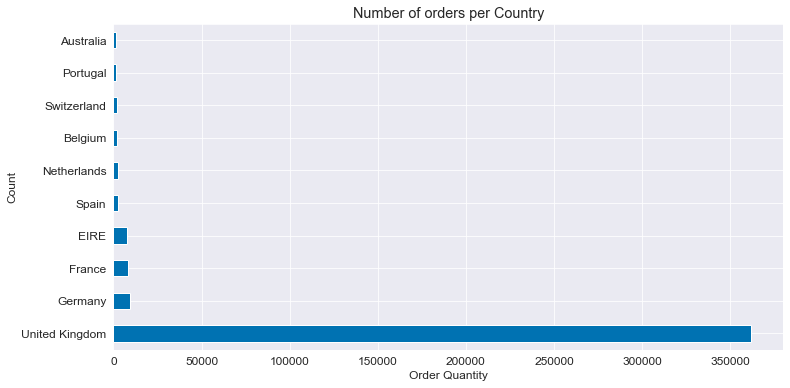

In [27]:
# Review which countries do the orders come from
retail_pp.Country.value_counts()[0:10].plot(kind='barh');
plt.title('Number of orders per Country')
plt.xlabel('Order Quantity');
plt.ylabel('Count');

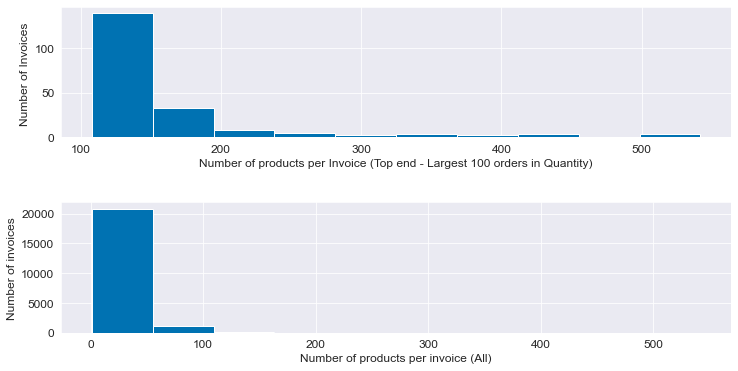

In [28]:
fig = plt.figure()

# Plotting the number of Quantities per invoice (Top end)
ax1 = fig.add_subplot(211)
retail_pp.groupby('InvoiceNo').Quantity.count().sort_values(ascending = False )[:200].plot(kind = 'hist',ax=ax1)
ax1.xaxis.set_label_text('Number of products per Invoice (Top end - Largest 100 orders in Quantity)');
ax1.yaxis.set_label_text('Number of Invoices ');

# Plotting the number of Quantities per invoice (All)
ax2 = fig.add_subplot(212)
retail_pp.groupby('InvoiceNo').Quantity.count().sort_values(ascending = False).plot(kind='hist', ax=ax2);
ax2.xaxis.set_label_text('Number of products per invoice (All)');
ax2.yaxis.set_label_text('Number of invoices');
fig.subplots_adjust(hspace=0.5)

In [29]:
retail_pp['Revenue'] = retail_pp.UnitPrice * retail_pp.Quantity
retail_pp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth,Revenue
Date,,,,,,,,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,536365,N,2010,12,201012,15.30
2010-12-01,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,20.34
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,536365,N,2010,12,201012,22.00
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,20.34
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,20.34


In [30]:
# 1. Revenue - Generate Monthly KPIs DataFrame by aggregating Revenue
m_kpis = pd.DataFrame(retail_pp.groupby([retail_pp.index.year,retail_pp.index.month])['Revenue'].sum())

# 2. Generate Monthly Growth rate based on previous months revenue
m_kpis['MonthlyGrowth'] = m_kpis['Revenue'].pct_change()

# 3. Generate Active Customers
m_kpis['ActiveCustomers'] = pd.DataFrame(retail_pp.groupby([retail_pp.index.year,retail_pp.index.month])['CustomerID'].nunique())

# 4. Generate Monthly Order Count (Quantity)
m_kpis['MonthlyOrderCount'] = pd.DataFrame(retail_pp.groupby([retail_pp.index.year,retail_pp.index.month])['Quantity'].sum())

# 5. Gengerate Monthly Order Average
m_kpis['MonthlyOrderAverage'] =  pd.DataFrame(retail_pp.groupby([retail_pp.index.year,retail_pp.index.month])['Revenue'].mean())

# Rename index to capture Year and Month
m_kpis.index.set_names(['Year', 'Month'], inplace = True)
m_kpis


Revenue  MonthlyGrowth  ActiveCustomers  MonthlyOrderCount  \
Year Month                                                                   
2010 12      554604.020            NaN              948             296362   
2011 1       475074.380      -0.143399              783             269379   
     2       436546.150      -0.081099              798             262833   
     3       579964.610       0.328530             1020             344012   
     4       426047.851      -0.265390              899             278585   
     5       648251.080       0.521545             1079             367852   
     6       608013.160      -0.062072             1051             356922   
     7       574238.481      -0.055549              993             363418   
     8       616368.000       0.073366              980             386612   
     9       931440.372       0.511176             1302             537496   
     10      974603.590       0.046340             1425             569666   
     11     1132407.740       0.161916             1711             669915   
     12      342506.380      -0.697541              686             203836   

            MonthlyOrderAverage  
Year Month                       
2010 12               20.655643  
2011 1                21.681014  
     2                21.438204  
     3                20.845540  
     4                18.365715  
     5                22.424626  
     6                21.842691  
     7                20.879881  
     8                22.282120  
     9                22.817118  
     10               19.224846  
     11               17.262839  
     12               19.393374

In [31]:
retail_pp['Revenue'] = retail_pp.UnitPrice * retail_pp.Quantity
retail_pp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceNumber,InvoiceCode,Year,Month,YearMonth,Revenue
Date,,,,,,,,,,,,,,
2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,536365,N,2010,12,201012,15.30
2010-12-01,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,20.34
2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,536365,N,2010,12,201012,22.00
2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,20.34
2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,536365,N,2010,12,201012,20.34


In [32]:
# Generate new dataframe based on unique CustomerID to keep track of RFM scores
customer = pd.DataFrame(retail_pp['CustomerID'].unique())
customer.columns = ['CustomerID']

In [34]:
# Generate new data frame based on latest Invoice date from retail_ppp dataframe per Customer (groupby = CustomerID)
recency = retail_pp.groupby('CustomerID').InvoiceDate.max().reset_index()
recency.columns = ['CustomerID','LastPurchaseDate']

# Set observation point as the last invoice date in the dataset
LastInvoiceDate = recency['LastPurchaseDate'].max()

# Generate Recency in days by subtracting the Last Purchase date for each customer from the Last Invoice Date
recency['Recency'] = (LastInvoiceDate - recency['LastPurchaseDate']).dt.days

In [35]:
# Consolidate to customer DataFrame
customer = pd.merge(customer, recency[['CustomerID','Recency']], on='CustomerID')
customer.head()

,CustomerID,Recency
0,17850.0,301
1,13047.0,31
2,12583.0,2
3,13748.0,95
4,15100.0,329


In [36]:
# Review statistics around Recency score 
customer.describe()

,CustomerID,Recency
count,4372.000000,4372.000000
mean,15299.677722,91.047118
std,1722.390705,100.765435
min,12346.000000,0.000000
25%,13812.750000,16.000000
50%,15300.500000,49.000000
75%,16778.250000,142.000000
max,18287.000000,373.000000


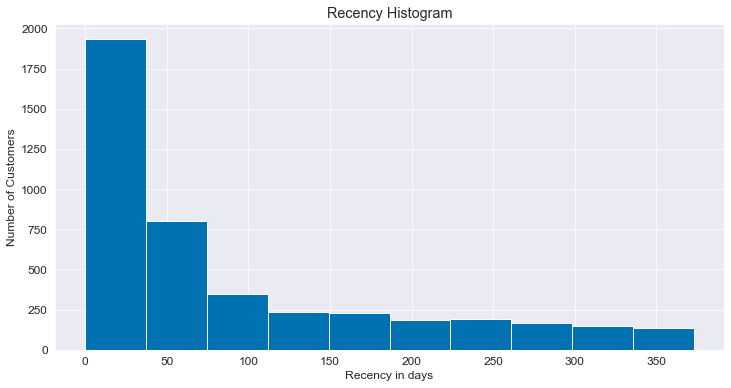

In [37]:
# Plot Recency
customer.Recency.plot.hist();
plt.xlabel("Recency in days")
plt.ylabel("Number of Customers")
plt.title("Recency Histogram");

In [38]:
# Count number of invoices per CustomerID and store in new frequency Dataframe
frequency = retail_pp.groupby('CustomerID').InvoiceDate.count().reset_index()
frequency.columns = ['CustomerID','Frequency']

# Consolidate Frequency to existing Customer DataFrame
customer = pd.merge(customer, frequency, on='CustomerID')

In [39]:
customer.head()

,CustomerID,Recency,Frequency
0,17850.0,301,312
1,13047.0,31,196
2,12583.0,2,251
3,13748.0,95,28
4,15100.0,329,6


In [40]:
retail_ppp = retail_pp

In [41]:
customer.describe()

,CustomerID,Recency,Frequency
count,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.047118,93.053294
std,1722.390705,100.765435,232.471608
min,12346.000000,0.000000,1.000000
25%,13812.750000,16.000000,17.000000
50%,15300.500000,49.000000,42.000000
75%,16778.250000,142.000000,102.000000
max,18287.000000,373.000000,7983.000000


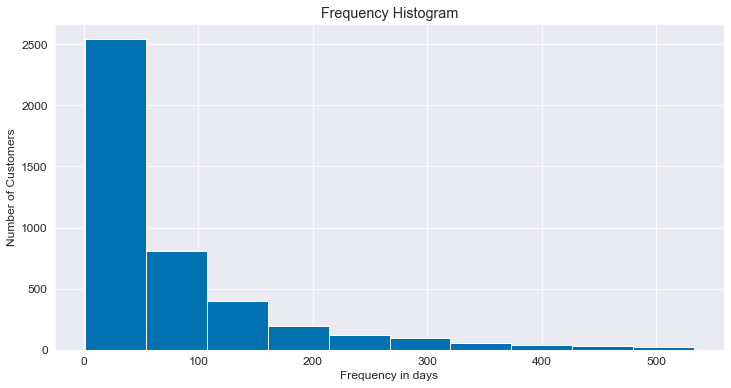

In [42]:
customer.Frequency.sort_values().head(4300).plot.hist();
plt.xlabel("Frequency in days")
plt.ylabel("Number of Customers")
plt.title("Frequency Histogram");

In [43]:
# Revenue per transaction has already been calculated as per KPIs section
# Grouping revenue per Customer ID
revenue = retail_ppp.groupby('CustomerID').Revenue.sum().reset_index()

# Consolidate Revenue to existing Customer DataFrame
customer = pd.merge(customer, revenue, on='CustomerID')
customer.head()

,CustomerID,Recency,Frequency,Revenue
0,17850.0,301,312,5288.63
1,13047.0,31,196,3079.10
2,12583.0,2,251,7187.34
3,13748.0,95,28,948.25
4,15100.0,329,6,635.10


In [44]:
customer.describe()

,CustomerID,Recency,Frequency,Revenue
count,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,91.047118,93.053294,1898.459701
std,1722.390705,100.765435,232.471608,8219.345141
min,12346.000000,0.000000,1.000000,-4287.630000
25%,13812.750000,16.000000,17.000000,293.362500
50%,15300.500000,49.000000,42.000000,648.075000
75%,16778.250000,142.000000,102.000000,1611.725000
max,18287.000000,373.000000,7983.000000,279489.020000


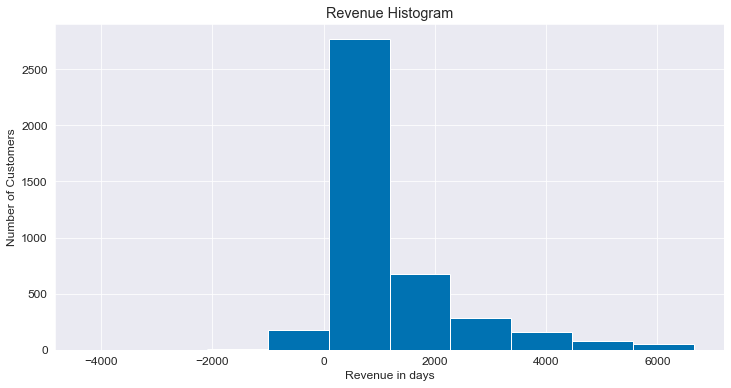

In [45]:
customer.Revenue.sort_values().head(4200).plot.hist();
plt.xlabel("Revenue in days")
plt.ylabel("Number of Customers")
plt.title("Revenue Histogram");

Text(0, 0.5, 'Revenue')

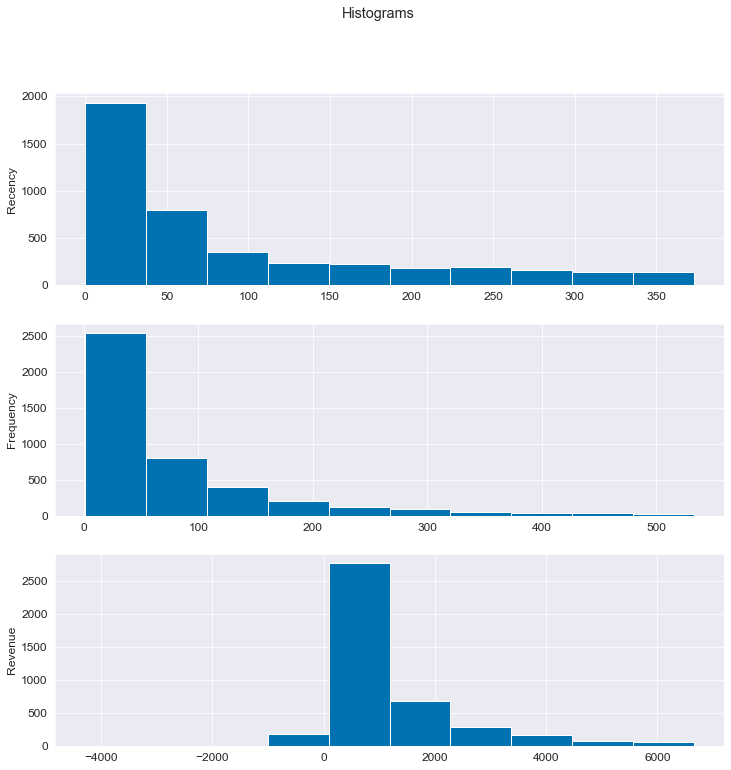

In [46]:
fig, (ax4, ax5, ax6) = plt.subplots(3)
fig.suptitle('Histograms')
customer.Recency.plot.hist(ax = ax4, figsize = (12,12));
customer.Frequency.sort_values().head(4300).plot.hist(ax = ax5);
customer.Revenue.sort_values().head(4200).plot.hist(ax = ax6);
ax4.set_ylabel('Recency')
ax5.set_ylabel('Frequency')
ax6.set_ylabel('Revenue')

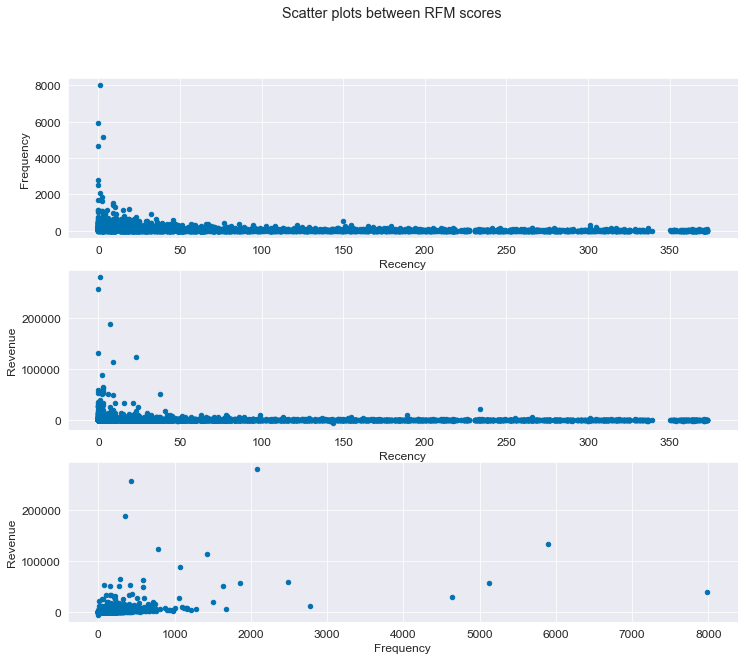

In [47]:
# Finally lets review the scatter plots between the different scores

fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Scatter plots between RFM scores')
customer.plot.scatter(x = 'Recency', y = 'Frequency', ax = ax1, figsize = (12,10));
customer.plot.scatter(x = 'Recency', y = 'Revenue', ax = ax2);
customer.plot.scatter(x = 'Frequency', y = 'Revenue', ax = ax3);

In [48]:
# Creating input features variable
X = customer.loc[:, 'Recency':'Revenue']
X.head()

,Recency,Frequency,Revenue
0,301,312,5288.63
1,31,196,3079.10
2,2,251,7187.34
3,95,28,948.25
4,329,6,635.10


In [49]:
# Number of clusters (Configurable) - Initially we're attempting based on the 3 Segments (Low, Mid, High)
k=3

In [50]:
# Scaling input using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xstd = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [51]:
# Run and train main K-means algorithm based on all input features
from sklearn.cluster import KMeans
model = KMeans(n_clusters=k, random_state=0)
model.fit(Xstd)

KMeans(n_clusters=3, random_state=0)

In [52]:
# Review output cluster labels
cluster_labels = model.labels_
print("Assigned cluster labels: \n", cluster_labels)

Assigned cluster labels: 
 [0 1 1 ... 1 1 1]


In [53]:
# Review Centroids of clusters
centroids = model.cluster_centers_
print("Location of centroids: ")
print(centroids)

Location of centroids: 
[[ 1.53076400e+00 -2.80810509e-01 -1.74427230e-01]
 [-5.17104330e-01  5.17752777e-02  6.86884206e-03]
 [-8.63957712e-01  1.18416391e+01  1.42137753e+01]]


In [54]:
# Append clusters to input features table
Xstd['clusters'] = cluster_labels
Xstd.head()

,Recency,Frequency,Revenue,clusters
0,2.083819,0.941929,0.412510,0
1,-0.595978,0.442886,0.143658,1
2,-0.883808,0.679501,0.643541,1
3,0.039233,-0.279865,-0.115620,1
4,2.361724,-0.374511,-0.153723,0


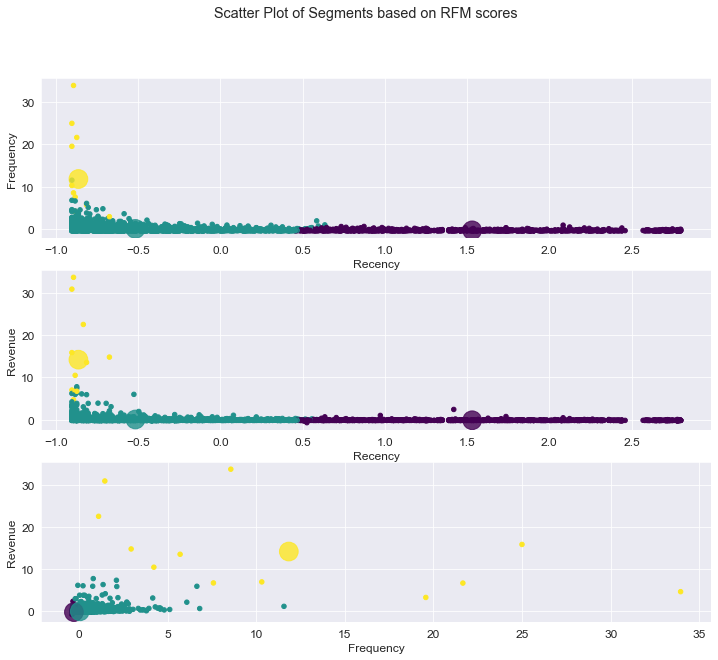

In [55]:
# Scatter plot of data coloured by cluster they belong to
fig, (ax4, ax5, ax6) = plt.subplots(3);
fig.suptitle('Scatter Plot of Segments based on RFM scores');

Xstd.plot.scatter(x = 'Recency', y = 'Frequency', c=Xstd['clusters'], colormap='viridis', ax=ax4, colorbar=False,figsize = (12,10));
ax4.scatter(centroids[:,0], centroids[:,1], marker='o', s=350, alpha=.8, c=range(0,k),
            cmap='viridis');

Xstd.plot.scatter(x = 'Recency', y = 'Revenue', c=Xstd['clusters'], colormap='viridis', ax=ax5, colorbar=False);
ax5.scatter(centroids[:,0], centroids[:,2], marker='o', s=350, alpha=.8, c=range(0,k),
            cmap='viridis');

Xstd.plot.scatter(x = 'Frequency', y = 'Revenue', c=Xstd['clusters'], colormap='viridis', ax=ax6, colorbar=False);
ax6.scatter(centroids[:,1], centroids[:,2], marker='o', s=350, alpha=.8, c=range(0,k),
            cmap='viridis');


In [56]:
    customer['Cluster'] = cluster_labels
customer.Cluster.unique()

array([0, 1, 2])

In [57]:
customer['Profile'] = cluster_labels
customer['Profile'].replace({0: "Low Value", 1: "Mid Value", 2: "High Value"}, inplace = True)

In [58]:
customer.head()

,CustomerID,Recency,Frequency,Revenue,Cluster,Profile
0,17850.0,301,312,5288.63,0,Low Value
1,13047.0,31,196,3079.10,1,Mid Value
2,12583.0,2,251,7187.34,1,Mid Value
3,13748.0,95,28,948.25,1,Mid Value
4,15100.0,329,6,635.10,0,Low Value


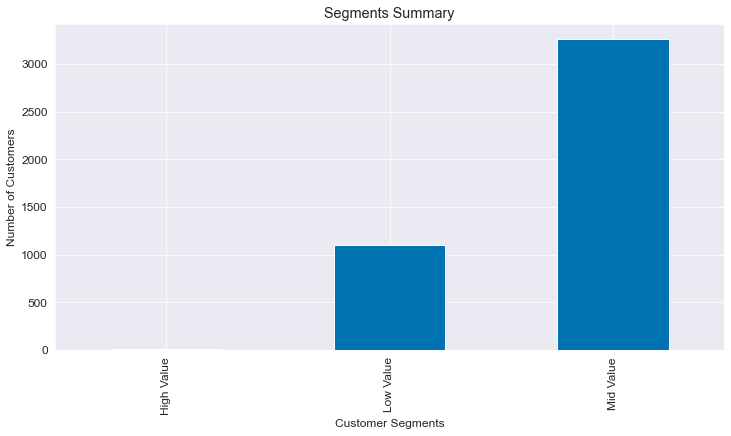

In [59]:
customer.groupby('Profile').Profile.count().plot.bar()
plt.xlabel("Customer Segments")
plt.ylabel("Number of Customers")
plt.title("Segments Summary");

In [60]:
customer.groupby('Profile').Profile.count()

Profile
High Value      12
Low Value     1103
Mid Value     3257
Name: Profile, dtype: int64

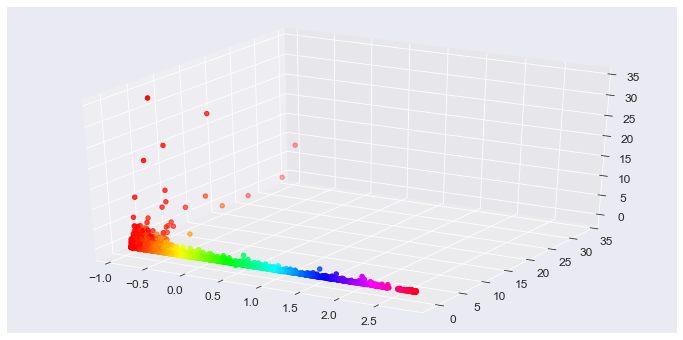

In [61]:
from mpl_toolkits import mplot3d
z_points = Xstd['Frequency']
x_points = Xstd['Recency']
y_points = Xstd['Revenue']
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x_points, y_points, z_points, c=x_points, cmap='hsv');
plt.show()